## 1.1.4. Elastic-Net

Elastic-Net은 Lasso와 Ridge를 결합한 방법입니다.<br><br>
Lasso 는 서로 상관관계가 높은 피처들의 경우에 중요한 피처만을 선택하고 다른 피처들은 모두 회귀 계수를 0으로 만드는 성향이 강합니다.<br><br>
이러한 성향으로 인해 alpha값에 따라 회귀 계수의 값이 급격히 변동할 수도 있는데 Elastic-Net은 이를 완화하기 위해 Ridge를 Lasso에 추가한 것입니다.<br><br>
단점은 Lasso와 Ridge가 결합된 규제로 인해 수행시간이 상대적으로 오래걸린다는 것입니다.

$ Lasso = \min_{w}||X_w - y||^{2}_{2} + \alpha||w||_1 $
<br><br><br>
$ Ridge =  \min_{w}||X_w - y||_{2}^{2} + \alpha||w||_{2}^{2} $
<br><br><br>
$ ElasticNet =  \min_{w}||X_w - y||_{2}^{2} + \alpha_{1}||w||_1 + \alpha_{2}||w||_{2}^{2} $

scikit-learn의 ElasticNet Library 에는 $alpha$, $l1\_ ratio$ 두가지 파라미터가 있습니다.<br><br>
$ alpha = \alpha_{1} + \alpha_{2}$<br><br>
$ l1\_ ratio = \frac{\alpha_{1}}{\alpha_{1} + \alpha_{2}} $ <br><br>
$ l1\_ ratio $ 가 0 이면 $\alpha_{1}$가 0이므로 Ridge와 동일합니다. <br><br>
$ l1\_ ratio $ 가 1 이면 $\alpha_{2}$가 0이므로 Lasso와 동일합니다. <br><br>
다시 말하면 $ l1\_ ratio $ 가 0에 가까우면 Ridge와 비슷한 특성을 갖고 1에 가까우면 Lasso와 비슷한 특성을 갖습니다.

### Example) Boston dataset

In [1]:
import warnings

warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
%matplotlib inline

boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이터 세트 크기:', bostonDF.shape)

bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- CRIM : 지역별 범죄 발생률<br><br>
- ZN : 25,000 평방 피트를 초과하는 거주 지역의 비율<br><br>
- INDUS : 비상업 지역 넓이 비율<br><br>
- CHAS : 찰스강에 대한 더미 변수(강의 경계에 위치한 경우 1, 아니면 0)<br><br>
- NOX : 일산화질소 농도<br><br>
- RM : 거주할 수 있는 방 개수<br><br>
- AGE : 1940년 이전에 건축된 소유 주택의 비율<br><br>
- DIS : 5개 주요 고용센터까지의 가중 거리<br><br>
- RAD : 고속도로 접근 용이도<br><br>
- TAX : 10,000 달러당 재산세율<br><br>
- PTRATIO : 지역의 교사와 학생 수 비율<br><br>
- B : 지역의 흑인 거주 비율<br><br>
- LSTAT : 하위 계층의 비율<br><br>
- target : 본인 소유의 주택 가격(중앙값)<br><br>

In [2]:
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis = 1, inplace = False)

<AxesSubplot:>

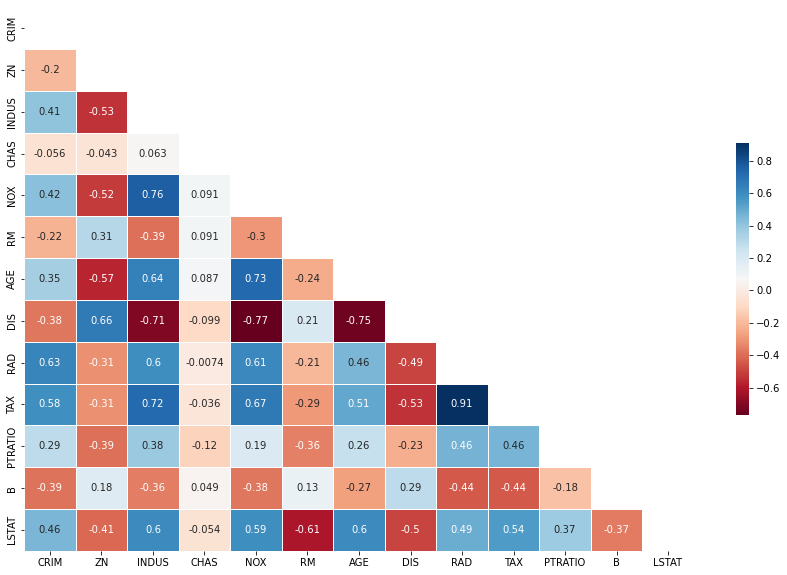

In [3]:
plt.figure(figsize=(15, 10))

mask = np.zeros_like(X_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(X_data.corr(), 
            annot=True, 
            mask = mask,
            cmap='RdBu',
            linewidths=.5,
            cbar_kws={'shrink': .5})

- Linear Model

In [4]:
model = LinearRegression()

# cross_val_score는 가장 높은 값을 반환하는데 mse는 작은 값이 좋은 값이므로 neg mse를 구하고 -를 붙여 mse로 만든다
neg_mse_scores = cross_val_score(model, X_data, y_target, scoring='neg_mean_squared_error', cv=5)

avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))

print(f'5 폴드 세트의 평균 RMSE : {np.round(avg_rmse, 3)}')

model.fit(X_data, y_target)

coeff = pd.Series(data = model.coef_, index = X_data.columns)
coeff.sort_values(ascending=False)

5 폴드 세트의 평균 RMSE : 5.829


RM          3.809865
CHAS        2.686734
RAD         0.306049
ZN          0.046420
INDUS       0.020559
B           0.009312
AGE         0.000692
TAX        -0.012335
CRIM       -0.108011
LSTAT      -0.524758
PTRATIO    -0.952747
DIS        -1.475567
NOX       -17.766611
dtype: float64

In [56]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######## ', model_name, ' ########')
    for param in params:
        if model_name == 'Ridge' :
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.5)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)

        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE : {np.round(avg_rmse, 3)}')

        model.fit(X_data_n, y_target_n)

        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = 'alpha : ' + str(param)
            coeff_df[colname] = coeff
    return coeff_df

- Ridge

In [57]:
alphas = [0.07, 0.1, 0.5, 1, 3]

In [58]:
coeff_ridge_df = get_linear_reg_eval('Ridge', params=alphas, X_data_n = X_data, y_target_n = y_target)

sort_column = 'alpha : ' + str(alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

########  Ridge  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.799
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.788
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.7
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.653
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.589


,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.815869,3.818233,3.840757,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.533343,-0.542009


- Lasso

In [59]:
coeff_lasso_df = get_linear_reg_eval('Lasso',  params=alphas, X_data_n = X_data, y_target_n = y_target)

sort_column = 'alpha : ' + str(alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

########  Lasso  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE : 6.189


,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


- Elastic Net

In [60]:
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=alphas, X_data_n = X_data, y_target_n = y_target)

sort_column = 'alpha : ' + str(alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

########  ElasticNet  ########
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.503
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.478
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.413
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.522
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.954


,alpha : 0.07,alpha : 0.1,alpha : 0.5,alpha : 1,alpha : 3
RM,3.445833,3.252662,1.723610,0.933936,0.000000
CHAS,1.287475,0.987970,0.000000,0.000000,0.000000
RAD,0.284007,0.288726,0.311583,0.301569,0.199147
ZN,0.050678,0.051377,0.054045,0.053240,0.046018
B,0.010035,0.009963,0.008997,0.008339,0.007271
AGE,-0.008997,-0.007219,0.009475,0.020579,0.038926
TAX,-0.014636,-0.014952,-0.016300,-0.016439,-0.013587
INDUS,-0.045733,-0.045901,-0.031702,-0.012657,-0.000000
CRIM,-0.100331,-0.100079,-0.092503,-0.080371,-0.040903
NOX,-0.484864,-0.059533,-0.000000,-0.000000,-0.000000


# Coefficient

In [61]:
alphas = [0.07, 0.1, 0.5, 1, 1.5, 3]

- Lasso

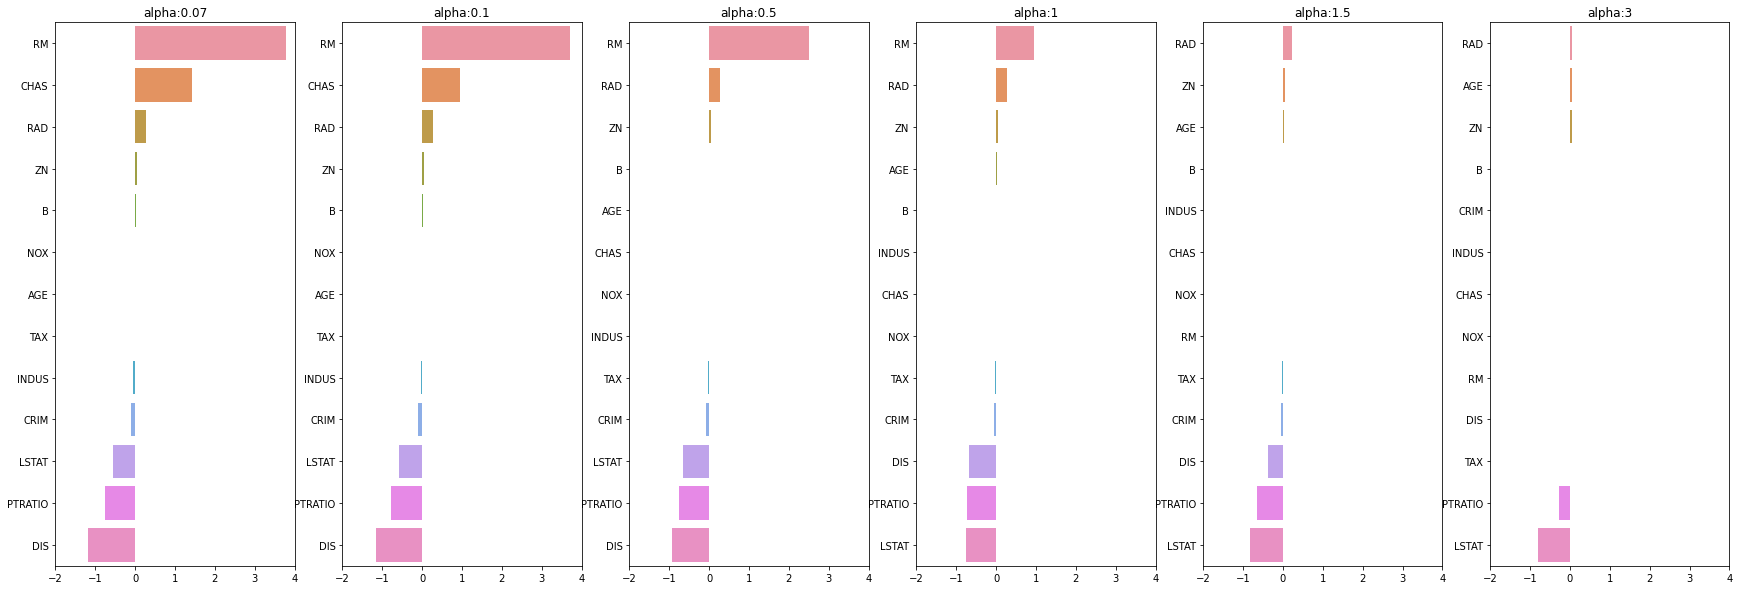

In [62]:
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_data, y_target)

    coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
    colname='alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

    axs[pos].set_title(colname)
    axs[pos].set_xlim(-2, 4)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

- ElasticNet

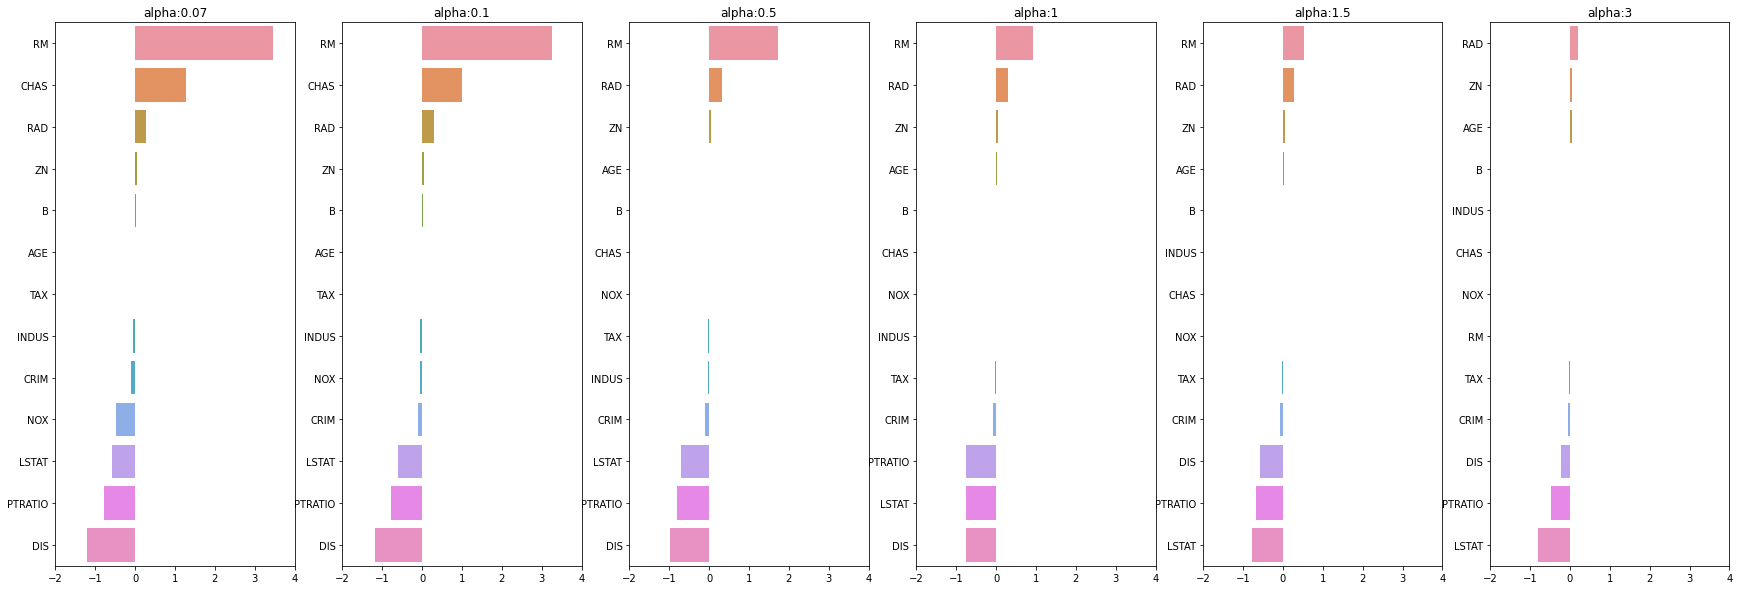

In [63]:
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=6)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    elastic = ElasticNet(alpha = alpha, l1_ratio=0.5)
    elastic.fit(X_data, y_target)

    coeff = pd.Series(data=elastic.coef_, index=X_data.columns)
    colname='alpha:' + str(alpha)
    coeff_df[colname] = coeff

    coeff = coeff.sort_values(ascending=False)

    axs[pos].set_title(colname)
    axs[pos].set_xlim(-2, 4)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])